2025-01-05 23:29:37.533 python[37246:1108430] +[IMKClient subclass]: chose IMKClient_Legacy
2025-01-05 23:29:37.533 python[37246:1108430] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
2025-01-05 23:29:55.014 python[37246:1108430] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


...30% Drop duplicates
...40% Converting all columns to uppercase
...70% Removing 'Time' column
...80% Removing Folder and System
... 100% Done!
...30% Drop duplicates
...40% Converting all columns to uppercase
...70% Removing 'Time' column
...80% Removing Folder and System
... 100% Done!
...30% Drop duplicates
...40% Converting all columns to uppercase
...70% Removing 'Time' column
...80% Removing Folder and System
... 100% Done!
...Implementing a second clean


2025-01-05 23:30:59.212 python[37246:1108430] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


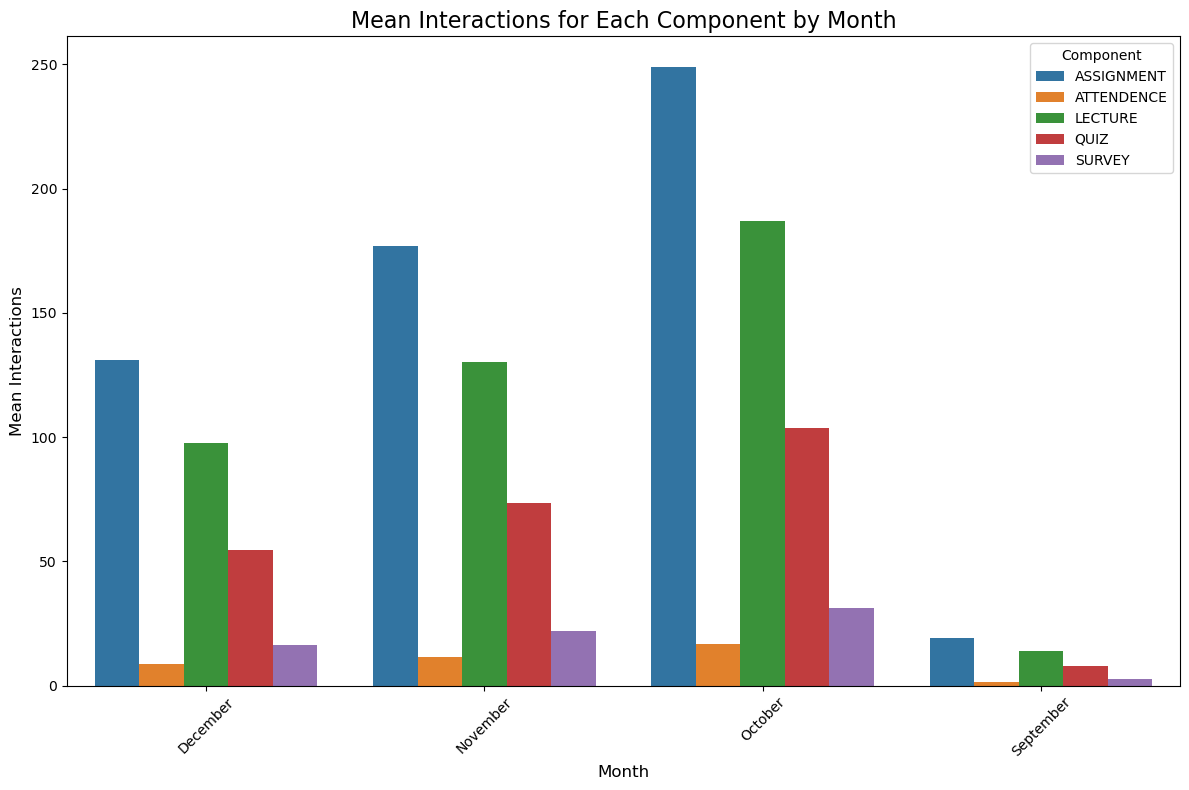

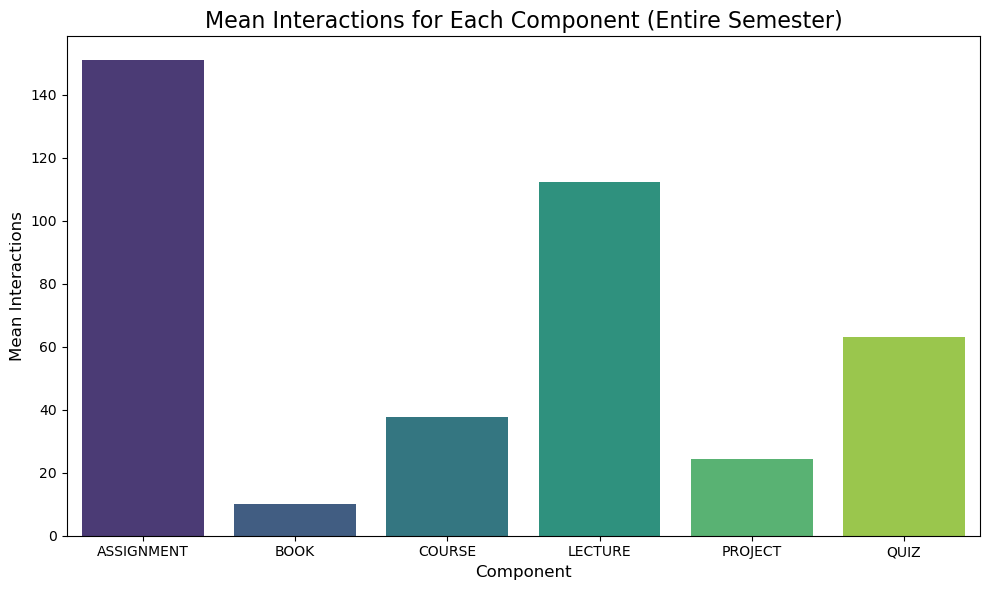

    USER_ID     MONTH       COMPONENT  INTERACTIONS
0         1  December      ASSIGNMENT            32
1         1  December      ATTENDENCE             2
2         1  December          COURSE             6
3         1  December         LECTURE            26
4         1  December          MANUAL             8
5         1  December            PAGE             2
6         1  December   QUESTIONNAIRE             2
7         1  December            QUIZ            14
8         1  December  STUDY_MATERIAL             6
9         1  December          SURVEY             4
10        1  December            TEST            12
11        1  December             URL             4
12        1  November      ASSIGNMENT           112
13        1  November      ATTENDENCE             7
14        1  November          COURSE            21
15        1  November         LECTURE            91
16        1  November          MANUAL            28
17        1  November            PAGE             7
18        1 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tkinter as tk
from tkinter import filedialog, messagebox, ttk

class DataCleaningApp:
    def __init__(self, root):
        # Initialize the GUI application
        self.root = root
        self.root.title("Data Cleaning Tool")
        self.root.geometry("800x600")  # Increased size for better layout

        # File paths to store uploaded file locations
        self.activity_file = ""
        self.component_file = ""
        self.user_file = ""
        self.json_file = ""

        # Set up GUI components
        self.setup_gui()

    def setup_gui(self):
        # Add a frame for better organization
        frame = tk.Frame(self.root, padx=10, pady=10)
        frame.pack(fill=tk.BOTH, expand=True)

        # Welcome label with styling
        self.label = tk.Label(frame, text="Welcome to the Data Cleaning Tool", font=("Arial", 18, "bold"))
        self.label.pack(pady=20)

        # Create a notebook (tabbed interface) for better organization
        self.notebook = ttk.Notebook(frame)
        self.notebook.pack(fill=tk.BOTH, expand=True, pady=10)

        # Tab 1: File Uploads
        self.upload_tab = ttk.Frame(self.notebook)
        self.notebook.add(self.upload_tab, text="Upload Files")

        # Tab 2: Data Cleaning and Export
        self.cleaning_tab = ttk.Frame(self.notebook)
        self.notebook.add(self.cleaning_tab, text="Data Cleaning")

        # Tab 3: Analysis
        self.analysis_tab = ttk.Frame(self.notebook)
        self.notebook.add(self.analysis_tab, text="Analysis")

        # Add upload buttons to the first tab
        self.setup_upload_tab()

        # Add cleaning and export options to the second tab
        self.setup_cleaning_tab()

        # Add analysis options to the third tab
        self.setup_analysis_tab()

    def setup_upload_tab(self):
        # Upload Tab: File selection buttons with tooltips
        tk.Label(self.upload_tab, text="Please upload the required files:", font=("Arial", 14)).pack(pady=10)

        self.upload_activity_button = ttk.Button(self.upload_tab, text="Upload Activity File", command=self.upload_activity_file)
        self.upload_activity_button.pack(pady=5)
        self.add_tooltip(self.upload_activity_button, "Upload the activity file (CSV or JSON format)")

        self.upload_component_button = ttk.Button(self.upload_tab, text="Upload Component File", command=self.upload_component_file)
        self.upload_component_button.pack(pady=5)
        self.add_tooltip(self.upload_component_button, "Upload the component file (CSV or JSON format)")

        self.upload_user_button = ttk.Button(self.upload_tab, text="Upload User File", command=self.upload_user_file)
        self.upload_user_button.pack(pady=5)
        self.add_tooltip(self.upload_user_button, "Upload the user file (CSV or JSON format)")

        self.upload_json_button = ttk.Button(self.upload_tab, text="Upload JSON File (Optional)", command=self.upload_json_file)
        self.upload_json_button.pack(pady=5)
        self.add_tooltip(self.upload_json_button, "Upload an optional JSON file for additional analysis")

    def setup_cleaning_tab(self):
        # Cleaning Tab: Data cleaning and export buttons
        tk.Label(self.cleaning_tab, text="Data Cleaning Options:", font=("Arial", 14)).pack(pady=10)

        self.clean_button = ttk.Button(self.cleaning_tab, text="Clean Data", state=tk.DISABLED, command=self.clean_data)
        self.clean_button.pack(pady=10)
        self.add_tooltip(self.clean_button, "Clean the uploaded data files")

        self.export_button = ttk.Button(self.cleaning_tab, text="Export Cleaned Data to JSON", state=tk.DISABLED, command=self.export_json)
        self.export_button.pack(pady=10)
        self.add_tooltip(self.export_button, "Export the cleaned data to a JSON file")

    def setup_analysis_tab(self):
        # Analysis Tab: Visualization and statistics buttons
        tk.Label(self.analysis_tab, text="Analysis and Visualization:", font=("Arial", 14)).pack(pady=10)

        self.plot_button = ttk.Button(self.analysis_tab, text="Generate Plots", state=tk.DISABLED, command=self.generate_plots)
        self.plot_button.pack(pady=10)
        self.add_tooltip(self.plot_button, "Generate visualizations based on the cleaned data")

        self.stats_button = ttk.Button(self.analysis_tab, text="Show Statistics", state=tk.DISABLED, command=self.show_statistics)
        self.stats_button.pack(pady=10)
        self.add_tooltip(self.stats_button, "Display statistical summaries of the cleaned data")

    def add_tooltip(self, widget, text):
    #Helper function to add a tooltip to a widget
        tooltip = tk.Label(
            self.root,
            text=text,
            bg="yellow",
            fg="black",
            relief=tk.SOLID,
            borderwidth=1,
            font=("Arial", 10),
            padx=5,
            pady=2
        )
        tooltip.place_forget()  # Initially hide the tooltip

        def on_enter(event):
            x = widget.winfo_rootx() + widget.winfo_width() // 2 
            y = widget.winfo_rooty() - tooltip.winfo_reqheight() - 2 
            tooltip.place(x=x, y=y)

        def on_leave(event):
            tooltip.place_forget()

        widget.bind("<Enter>", on_enter)
        widget.bind("<Leave>", on_leave)

    def upload_activity_file(self):
        # Upload activity log file
        self.activity_file = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv"), ("JSON Files", "*.json")])
        if self.activity_file:
            messagebox.showinfo("File Uploaded", f"Activity File Loaded: {self.activity_file}")
            self.check_all_files_uploaded()

    def upload_component_file(self):
        # Upload component log file
        self.component_file = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv"), ("JSON Files", "*.json")])
        if self.component_file:
            messagebox.showinfo("File Uploaded", f"Component File Loaded: {self.component_file}")
            self.check_all_files_uploaded()

    def upload_user_file(self):
        # Upload user log file
        self.user_file = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv"), ("JSON Files", "*.json")])
        if self.user_file:
            messagebox.showinfo("File Uploaded", f"User File Loaded: {self.user_file}")
            self.check_all_files_uploaded()

    def upload_json_file(self):
        # Upload JSON file for further analysis
        self.json_file = filedialog.askopenfilename(filetypes=[("JSON Files", "*.json")])
        if self.json_file:
            messagebox.showinfo("File Uploaded", f"JSON File Loaded: {self.json_file}")

    def check_all_files_uploaded(self):
        # Enable the "Clean Data" button only when all required files are uploaded
        if self.activity_file and self.component_file and self.user_file:
            self.clean_button.config(state=tk.NORMAL)

    def load_file(self, file_path, missing_values=None):
        # Load CSV or JSON file into a pandas DataFrame
        try:
            if file_path.endswith('.csv'):
                # Handle missing values appropriately during CSV loading
                return pd.read_csv(file_path, keep_default_na=False, na_values=missing_values)
            elif file_path.endswith('.json'):
                return pd.read_json(file_path)
            else:
                print(f"Error: Unsupported file format for '{file_path}'. Supported formats are CSV and JSON.")
                return None
        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
            return None
        except ValueError as e:
            print(f"Error: Failed to parse the file '{file_path}'. Details: {e}")
            return None

    def clean(self, df):
        # Step-by-step cleaning of the DataFrame
        print("...30% Drop duplicates")
        df.drop_duplicates(inplace=True) # Remove duplicate rows

        print("...40% Converting all columns to uppercase")
        df.columns = [x.upper() for x in df.columns] # Ensure consistent column names
        
         # Standardising specific column data to uppercase for consistency
        if 'TARGET' in df.columns:
            df['TARGET'] = df['TARGET'].str.upper()

        if 'COMPONENT' in df.columns:
            df['COMPONENT'] = df['COMPONENT'].str.upper()

        if 'ACTION' in df.columns:
            df['ACTION'] = df['ACTION'].str.upper()

        print("...70% Removing 'Time' column")
        if 'TIME' in df.columns:
            df = df.drop(['TIME'], axis=1) # Remove 'Time' column as it's irrelevant
        
        # Exclude rows with 'FOLDER' and 'SYSTEM' in 'TARGET' or 'COMPONENT'
        values_to_exclude = ['FOLDER', 'SYSTEM']
        print("...80% Removing Folder and System")
        if 'TARGET' in df.columns:
            df = df[~df['TARGET'].isin(values_to_exclude)]

        if 'COMPONENT' in df.columns:
            df = df[~df['COMPONENT'].isin(values_to_exclude)]

        print("... 100% Done!")
        return df

    def second_clean(self, df):
        # Additional cleaning: Parsing dates, removing NaNs, adding month column
        print("...Implementing a second clean")
        df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')  # Handle invalid dates
        df = df.dropna() # Drop rows with missing values
        df['MONTH'] = df['DATE'].dt.strftime('%B') # Add month column for analysis
        df = df.drop_duplicates() # Ensure no duplicates
        df = df.sort_values(by="DATE") # Sort by date for better time-based analysis
        return df

    def clean_data(self):
        # Main function to load, clean, and merge data
        activity = self.load_file(self.activity_file)
        component = self.load_file(self.component_file)
        user = self.load_file(self.user_file)
        
        # Clean each file using the `clean` function
        df1 = self.clean(activity)
        df2 = self.clean(component)
        df3 = self.clean(user)
        
        # Rename 'User Full Name *Anonymised' column to 'USER_ID' for consistency
        df1.columns = ['USER_ID', 'COMPONENT', 'ACTION', 'TARGET']
        df3.columns = ['DATE', 'USER_ID']

        # Merge data on 'USER_ID' and 'COMPONENT' for interaction analysis
        df4_merge = pd.merge(df1, df3, on='USER_ID', how='inner')
        df4_merge2 = pd.merge(df4_merge, df2, on='COMPONENT', how='inner')
        
        # Perform second cleaning on the merged DataFrame
        df4_cleaned = self.second_clean(df4_merge2)
        df4_cleaned = df4_cleaned.reset_index(drop=True)

        self.df4_cleaned = df4_cleaned
        self.export_button.config(state=tk.NORMAL)
        self.plot_button.config(state=tk.NORMAL)
        self.stats_button.config(state=tk.NORMAL)

        messagebox.showinfo("Data Cleaned", "Data cleaning complete!")

    def export_json(self):
        # Export the cleaned DataFrame to a JSON file
        try:
            file_name = filedialog.asksaveasfilename(defaultextension=".json", filetypes=[("JSON files", "*.json")])
            if file_name:
                self.df4_cleaned.to_json(file_name, orient='records')
                messagebox.showinfo("Export Successful", f"File saved as {file_name}")
        except Exception as e:
            messagebox.showerror("Export Error", f"Error exporting file: {e}")

    def generate_plots(self):
        # Generate and display plots to analyze user interactions
        if not self.json_file:
            messagebox.showerror("Error", "JSON file not uploaded!")
            return

        df_json = self.load_file(self.json_file)
        df7 = df_json.groupby(['USER_ID', 'MONTH', 'COMPONENT']).size().reset_index(name='INTERACTIONS')
       
        # Focus on specific components for analysis
        components_to_analyse = ['QUIZ', 'LECTURE', 'ASSIGNMENT', 'ATTENDENCE', 'SURVEY']
        df8 = df7[df7['COMPONENT'].isin(components_to_analyse)]

        # Plot mean interactions by month
        monthly_stats = df8.groupby(['MONTH', 'COMPONENT'])['INTERACTIONS'].mean().reset_index()
        plt.figure(figsize=(12, 8))
        sns.barplot(x='MONTH', y='INTERACTIONS', hue='COMPONENT', data=monthly_stats)
        plt.title('Mean Interactions for Each Component by Month', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Mean Interactions', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Component')
        plt.tight_layout()
        plt.show()
        
        # Plot mean interactions for the semester
        df9 = df7[df7['COMPONENT'].isin(['ASSIGNMENT', 'QUIZ', 'LECTURE', 'BOOK', 'PROJECT', 'COURSE'])]
        semester_stats = df9.groupby('COMPONENT')['INTERACTIONS'].mean().reset_index()
        plt.figure(figsize=(10, 6))
        sns.barplot(x='COMPONENT', y='INTERACTIONS', data=semester_stats, palette='viridis')
        plt.title('Mean Interactions for Each Component (Entire Semester)', fontsize=16)
        plt.xlabel('Component', fontsize=12)
        plt.ylabel('Mean Interactions', fontsize=12)
        plt.tight_layout()
        plt.show()

    def show_statistics(self):
        # Show statistical summaries for interactions
        if not self.json_file:
            messagebox.showerror("Error", "JSON file not uploaded!")
            return

        df_json = self.load_file(self.json_file)
        df7 = df_json.groupby(['USER_ID', 'MONTH', 'COMPONENT']).size().reset_index(name='INTERACTIONS')
        print(df7.head(20))
        
        # Analyse components: Quiz, Lecture, Assignment, Attendance, Survey
        components_to_analyse = ['QUIZ', 'LECTURE', 'ASSIGNMENT', 'ATTENDENCE', 'SURVEY']
        df8 = df7[df7['COMPONENT'].isin(components_to_analyse)]

        # Monthly statistics
        monthly_stats = df8.groupby(['MONTH', 'COMPONENT'])['INTERACTIONS'].agg(
            mean='mean',
            mode=lambda x: x.mode()[0],
            median='median'
        ).reset_index()
        
        # Semester-wide statistics
        semester_stats = df8.groupby('COMPONENT')['INTERACTIONS'].agg(
            mean='mean',
            mode=lambda x: x.mode()[0],
            median='median'
        )
        
        # Display the statistics in the console
        print("Monthly statistics for Quiz, Lecture, Assignment, Attendance and Survey component:")
        print(monthly_stats)

        print("\nSemester-wide statistics for Quiz, Lecture, Assignment, Attendance and Survey component:")
        print(semester_stats)

if __name__ == "__main__":
    # Run the application
    root = tk.Tk()
    app = DataCleaningApp(root)
    root.mainloop()
